# NumPy_1
## #ndarray：n-dimensional array object，即為一般所稱的陣列
## #nfunc：universal function odject，對陣列處理的函數
### 檢視NumPy版本：

In [1]:
import numpy as np
np.__version__

'1.14.5'

### 修改ast_note_iteractively kernal選項來使得Jupyter為每一行的變量或語句執行這個操作，以便你可以立即看到多條語句一起輸出

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 透過shape更改陣列形狀(3, 4) ---> (4, 3)，不是轉置，是改變軸的大小，且元素個數不變

In [3]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
a
a.shape = 4, 3
a

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

### 當設定其中一軸為-1，將自動計算軸的長度

In [4]:
a.shape = 2, -1
a

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12]])

In [5]:
b = a.reshape(-1, 2)
b

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12]])

In [6]:
b[1][1] = 1000000 
# b[1] = 1000000 是修改整個第二列，b被修改同時a也被修改

b
a

array([[      1,       2],
       [      3, 1000000],
       [      5,       6],
       [      7,       8],
       [      9,      10],
       [     11,      12]])

array([[      1,       2,       3, 1000000,       5,       6],
       [      7,       8,       9,      10,      11,      12]])

## 元素型別

In [7]:
a.dtype

dtype('int32')

### 可在建立陣列時指定元素型別

In [8]:
c_int = np.array([1, 2, 3, 4], dtype = np.int32)
c_float = np.array([1, 2, 3, 4], dtype = np.float)
c_complex = np.array([1, 2, 3, 4], dtype = np.complex)

print(c_int.dtype, c_float.dtype, c_complex.dtype)

int32 float64 complex128


## 自動產生陣列
### np.arange(開始值，終值，步進值)

In [9]:
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

### np.linspace(開始值，終值，元素個數，endpoint = True/False)：建立 "等差數列" 的一維陣列，endpoint是否包含終值

In [10]:
np.linspace(0, 20, 5, endpoint=True)

array([ 0.,  5., 10., 15., 20.])

### np.logspace(開始值，終值，元素個數，base = 數值，endpoint = True/False)：建立 "等比數列" 的一維陣列，base可調整底數的值(預設為10)，endpoint是否包含終值

In [11]:
np.logspace(0, 5, 4, base=3, endpoint=False)

array([ 1.        ,  3.94822204, 15.58845727, 61.54669054])

### np.empty()：分配陣列所使用的記憶體，不進行初始化
### np.zeros()，np.ones()：將陣列初始化為0跟1

In [12]:
np.empty((2, 3), np.int)

array([[1368434144,        468, 1368434144],
       [       468, 1367318408,        468]])

In [13]:
np.zeros(4, np.int)

array([0, 0, 0, 0])

In [14]:
np.ones(4, np.int)

array([1, 1, 1, 1])

In [15]:
s = "jhsfdwbg"

### python的字串是一個"位元組序列"，一字一位元組
### fromstring(名稱，類型)：可以從位元組序列建立陣列
### fromfile()：可以從檔案建立陣列
### ex.利用fromstring寫二進位數直到檔案中，再利用fromfile讀取檔案

In [16]:
np.fromstring(s, dtype=np.int8)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


array([106, 104, 115, 102, 100, 119,  98, 103], dtype=int8)

In [17]:
print(98*256+97)
np.fromstring(s, dtype=np.int16)

25185


c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  


array([26730, 26227, 30564, 26466], dtype=int16)

In [18]:
np.fromstring(s, dtype=np.float)

c:\users\user\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """Entry point for launching an IPython kernel.


array([1.02846366e+190])

### fromfunction(函數名稱，陣列形狀)：透過函數建立一維陣列

In [19]:
def fun(x):
    return x + 1

np.fromfunction(fun, (10,))

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

### 也可以建立二維陣列

In [20]:
def fun2(x, y):
    return (x + 1) * (y + 1)
np.fromfunction(fun2, (9, 9))

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 4.,  8., 12., 16., 20., 24., 28., 32., 36.],
       [ 5., 10., 15., 20., 25., 30., 35., 40., 45.],
       [ 6., 12., 18., 24., 30., 36., 42., 48., 54.],
       [ 7., 14., 21., 28., 35., 42., 49., 56., 63.],
       [ 8., 16., 24., 32., 40., 48., 56., 64., 72.],
       [ 9., 18., 27., 36., 45., 54., 63., 72., 81.]])

### 和"清單"相同方式存取元素

In [21]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 切片：包含a[3]不包含a[6]

In [22]:
a[3:6] = 100, 30, 40
a

array([  0,   1,   2, 100,  30,  40,   6,   7,   8,   9])

### 第三參數是"步進值"

In [23]:
a[3:6:2]

array([100,  40])

### 產生新陣列b，b和a共同一塊儲存空間

In [24]:
b = a[2:9]
b[2] = 10

b
a

array([  2, 100,  10,  40,   6,   7,   8])

array([  0,   1,   2, 100,  10,  40,   6,   7,   8,   9])

### 當使用整數清單儲存陣列時，將使用陣列中的每個元素作為索引，清單陣列不和原始陣列共同資料

In [25]:
x = np.arange(10, 1, -1)
x
a = x[[3, 3, 1, 8]]
b = x[[3, 3, -3, 8]]
a
b

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

array([7, 7, 9, 2])

array([7, 7, 4, 2])

In [26]:
b[2] = 100

In [27]:
b

array([  7,   7, 100,   2])

In [28]:
x[[3, 5, 1]] = -1, -2, -3
x

array([10, -3,  8, -1,  6, -2,  4,  3,  2])

### In[25]可簡化成

In [29]:
x = np.arange(10 , 1, -1)
x[np.array([3, 3, 1, 8])]

array([7, 7, 9, 2])

### 布林陣列

In [30]:
x = np.arange(5, 0 ,-1)
x[np.array([True, False, True, False, False])]
# x[[True, False, True, False, False]] 新版 numpy 布林清單 被當成 布林陣列 惹

array([5, 3])

## 多維陣列

In [31]:
a = np.arange(0, 60, 10).reshape(-1, 1) + np.arange(0, 6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

### 下面依序介紹此陣列如何生成的：
### (1)生成垂直量

In [32]:
np.arange(0, 60, 10).reshape(-1, 1)

array([[ 0],
       [10],
       [20],
       [30],
       [40],
       [50]])

### (2)生成水平量，和垂直量相加

In [33]:
np.arange(0, 60, 10).reshape(-1, 1) + np.arange(0, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [34]:
a[0, :]        # 第0軸，所有元素
a[4:, 2:]      # 第4軸到結束，從第2個元素到結束
a[:, 3]        # 每一軸的第3個元素
a[3::3, ::3]   # 從第3軸到結束，步進3，的所有元素，步進也是3

array([0, 1, 2, 3, 4, 5])

array([[42, 43, 44, 45],
       [52, 53, 54, 55]])

array([ 3, 13, 23, 33, 43, 53])

array([[30, 33]])

### 二維陣列一樣能共用資料

In [35]:
b = a[0, 3:5]   # b = [3, 4]
b[0] = -b[0]    # b = [-3, 4]
a[0, 3:5]       # a[0, 3:5] = [-3, 4] 因為共用資料，所以a跟著被更改了

array([-3,  4])

### 利用slice(起，終，步進)函數進行切片

In [36]:
idx = slice(None, None, 2), slice(2, None) #a[::2, 2:]
a[idx]

array([[ 2, -3,  4,  5],
       [22, 23, 24, 25],
       [42, 43, 44, 45]])

### np.s_[ ]也可以進行切片，建立陣列索引

In [37]:
np.s_[::2, 2:]

(slice(None, None, 2), slice(2, None, None))

### 此陣列建立方法相當於a[0, 1], a[1, 2], a[2, 3], a[3, 4]

In [38]:
a[(0, 1, 2, 3), (1, 2, 3, 4)]

array([ 1, 12, 23, 34])

### 對垂直量利用布林陣列進行索引，水平量選取第3個元素

In [39]:
msk = np.array([1, 0 , 1, 0, 0, 1], dtype=np.bool)
a[msk, 3]

array([-3, 23, 53])

In [40]:
msk1 = np.array([1, 0, 1, 0, 0, 1])
msk2 = [True, False, True, False, False, True]
a[msk1, 2]
a[msk2, 2]

array([12,  2, 12,  2,  2, 12])

array([ 2, 22, 52])

### 當使用兩個形狀相同的陣列作為索引，可獲得和索引形狀相同的陣列
### 當未指定第1的索引時，使用:作為索引，獲得3D陣列

In [41]:
x = np.array([[0, 1], [2, 3]])
y = np.array([[-1, -2], [-3, -4]])
a[x, y]
a[x]

array([[ 5, 14],
       [23, 32]])

array([[[ 0,  1,  2, -3,  4,  5],
        [10, 11, 12, 13, 14, 15]],

       [[20, 21, 22, 23, 24, 25],
        [30, 31, 32, 33, 34, 35]]])

## 結構陣列
### 先定義一個dtype物件persontype，結構類型為一"字典"，字典中包含兩個"鍵"：'names', 'formats'，分別對應兩個"列表"，列表中包含："名稱"，"類型(30位元字串, np.int32, np.float32)"，align = True 為了使結構陣列的記憶體對齊與C語言結構類型一致
### 呼叫array()建立陣列，並檢視a的元素類型

In [42]:
persontype = np.dtype({
    'names':['name', 'age', 'weight'],
    'formats':['S30', 'i', 'f']}, align = True)
a = np.array([("Shen", 23, 62.5), ("Chen", 22, 55)],
            dtype = persontype)
a.dtype

dtype({'names':['name','age','weight'], 'formats':['S30','<i4','<f4'], 'offsets':[0,32,36], 'itemsize':40}, align=True)

### 取得a[0]的值與類型(注意元素不是tuple 是 struct)

In [43]:
print(a[0])
a[0].dtype

(b'Shen', 23, 62.5)


dtype({'names':['name','age','weight'], 'formats':['S30','<i4','<f4'], 'offsets':[0,32,36], 'itemsize':40}, align=True)

### 可利用欄位名稱作為索引

In [44]:
a[0]["name"]

b'Shen'

### 可藉由修改欄位，改變對應的元素值

In [45]:
c = a[0]
c["name"] = "Harry"
a[0]["name"]

b'Harry'

### 使用a.tofile()可將陣列a以二進位方式寫入檔案

In [46]:
a.tofile("test.bin")

### 利用C語言將test.bin檔案中的資料讀取出來
### %%file 可將該儲存格中的文字儲存成檔案read_struct_array.c

In [47]:
%%file read_struct_array.c
#include<stdio.h>

struct person{
    char name[30];
    int age;
    float weight;
};

struct person p[3];

void main(){
    FILE *fp;
    int i;
    fp = fopen("test.bin", "rb");
    fread(p, sizeof(struct person), 2, fp);
    fclose(fp);
    for(i = 0; i < 2; i++){
        printf("%s %d %f\n", p[i].name, p[i].age, p[i].weight);
    }
}

Overwriting read_struct_array.c


### 使用!執行系統指令呼叫gcc編譯C語言程式並執行

In [48]:
!gcc read_struct_array.c -o read_struct_array.exe
!read_struct_array.exe

Harry 23 62.500000
Chen 22 55.000000


## 記憶體結構
### b和a共用資料儲存，且b從a中隔一個元素取一次，使得stride變為a的兩倍(12, 4)---->(24, 8)

In [49]:
a = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]], dtype=np.float32)
b = a[::2, ::2]
b
b.strides
a

array([[0., 2.],
       [6., 8.]], dtype=float32)

(24, 8)

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]], dtype=float32)

In [50]:
print(a.flags)
print("c_contiguous:", a.flags.c_contiguous)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
c_contiguous: True


### 雷神之錘中使用0x5f3759df計算平方根倒數演算法

In [51]:
number = np.linspace(0.1, 10, 100)
y = number.astype(np.float32)  
x2 = y * 0.5
i = y.view(np.int32)  
i[:] = 0x5f3759df - (i >> 1)  
y = y * (1.5 - x2 * y * y)  
np.max(np.abs(1 / np.sqrt(number) - y))  

0.005045614041059743

Text(0,0.5,'真實值與近似值的誤差')

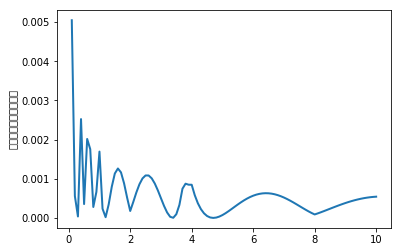

In [53]:
#%figonly=雷神之錘中計算平方根倒數算法的絕對誤差
import pylab as pl
pl.plot(number, 1/np.sqrt(number) - y, lw=2)
pl.ylabel(u"真實值與近似值的誤差")